In [2]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
img = cv2.imread("./fig1/puppy.bmp",1)

if img is None:
    print("image read failed!")
    sys.exit()

img_re = cv2.resize(img, (1200,800))


# cv2.namedWindow("image",cv2.WINDOW_AUTOSIZE)
cv2.imshow("image", img)
cv2.imshow("image_re", img_re)


while True:
    if cv2.waitKey() ==27:
        break
        
cv2.destroyAllWindows()

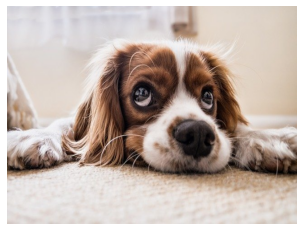

In [9]:
img = cv2.imread("./fig1/puppy.bmp",1)

if img is None:
    print("image read failed!")
    sys.exit()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [11]:
img_files = glob.glob('./fig1/images/*.*')

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN,
                     cv2.WINDOW_FULLSCREEN)

idx = 0

while  True:
    img = cv2.imread(img_files[idx])
    cv2.imshow('scene',img)
    
    if cv2.waitKey(3000) == 27:
        break
           
    idx += 1
    if idx >= len(img_files):
        idx = 0
        
cv2.destroyAllWindows()

In [4]:
img =np.ones((400,800,3), np.uint8)*255

cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
src = cv2.imread("./fig1/airplane.bmp")
mask = cv2.imread("./fig1/mask_plane.bmp",0)
dst = cv2.imread("./fig1/green.png")

if src is None or mask is None or dst is None:
    print("image read failed")
    sys.exit()

    
h, w = src.shape[:2]
dst_crop = dst[300:300+h, 300:300+w]
    
    
cv2.copyTo(src, mask, dst_crop)

cv2.imshow("src",src)
cv2.imshow("mask",mask)
cv2.imshow("dst",dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
#알파채널 띄우기

src = cv2.imread('./fig/imgbin_sunglasses_1.png', cv2.IMREAD_UNCHANGED)

mask = src[:,:,-1]

cv2.imshow('mask',mask)
cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
# 이미지 만들기

img = np.full((600,1200, 3),255, np.uint8)

cv2.line(img,(50,50),(200,100),(0,0,255),5, cv2.LINE_AA)
cv2.arrowedLine(img,(400,200),(400,400),(255,0,0),10,cv2.LINE_AA)
cv2.rectangle(img,(500,100),(600,200),(0,255,0),-1)
cv2.circle(img,(500,300),100,(255,0,0),10,cv2.LINE_AA)
cv2.ellipse(img,(800,300),(50,100),-10,0,270,(0,0,255),5,cv2.LINE_AA)

text = 'Hello opencv!'
cv2.putText(img,text,(1000,500), cv2.FONT_HERSHEY_SCRIPT_COMPLEX,
           2, (255,0,0),5,cv2.LINE_AA)

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
#카메라 영상띄우기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('output.avi', fourcc, fps,(h,w))
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame open failed')
        break
    edge = cv2.Canny(frame, 50,150) # 엣지 영상 띄우기
    frame_flip = cv2.flip(frame, 1) # 좌우 반대로 영상 띄우기
        
    out.write(frame_flip)
    
    cv2.imshow('frame',frame)
    cv2.imshow('edge', edge)
    cv2.imshow('frame_flip', frame_flip)
    
    if cv2.waitKey(30) == 27:
        break
        cap.release()
        
out.release()
cap.release()
cv2.destroyAllWindows()

In [16]:
#이미지 좌우반전 역전시키기
img = cv2.imread('./fig1/lenna.bmp',0)

cv2.imshow('img',img)

while True:
    key = cv2.waitKey()
    
    if key == 27 or key ==  ord('q'):
        break
        
    elif key == ord('i'):
        img = 255- img
        cv2.imshow('img', img)
        
    elif key == ord('e'):
        img = cv2.flip(img,1)
        cv2.imshow('img', img)
        
cv2.destroyAllWindows()

In [18]:
#동영상 캡처

cap = cv2.VideoCapture(0)

f_flag = False
i_flag = False

while True:
    ret, frame = cap.read()
    
    if f_flag:
        frame = cv2.flip(frame,1)
        
    if i_flag:
        frame = cv2.Canny(frame, 50, 150)
        
    cv2.imshow('image', frame)
    
    key = cv2.waitKey(30)
    
    if key == 27:
        break
        
    elif key == ord("f"): # 동영상 좌우반전
        f_flag = not f_flag
        
    elif key == ord('i'): # 동영상 엣지 화면
        i_flag = not i_flag
        
cap.release()
cv2.destroyAllWindows()

In [19]:
#마우스로 선그리기

def onMouse(event, x, y, flags, params):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy),(x,y),(0,0,255),10, cv2.LINE_AA)
            cv2.imshow('img', img)
            oldx, oldy = x, y

img = np.ones((480,640,3),np.uint8)*255

cv2.namedWindow('img')
cv2.setMouseCallback('img', onMouse, img)

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
#트랙바

def onMouse(pos):
    img[:] = np.round(img1*(pos/255),0).astype(np.uint8)
    cv2.imshow('img', img)

# img = np.zeros((480,640),np.uint8) #흰바탕에 트랙바

img = cv2.imread('./fig1/lenna.bmp',0)
img1 = img.copy()

cv2.namedWindow('img')
cv2.createTrackbar('Level','img',0,255,onMouse)
cv2.imshow('img', img1)

cv2.waitKey()
cv2.destroyAllWindows()

In [23]:
import time

In [27]:
tm = cv2.TickMeter()

tm.start()

img = cv2.imread("./fig1/lenna.bmp")
blur = cv2.GaussianBlur(img,(0,0),1)

tm.stop()
print(tm.getTimeMilli(),"ms")

3.4363 ms


In [22]:
tm = cv2.TickMeter()

t1 = time.time()

img = cv2.imread("./fig1/lenna.bmp")
blur = cv2.GaussianBlur(img,(0,0),1)

t2 = time.time()
print((t2-t1)*1000)

3.485441207885742


In [28]:
img = cv2.imread('./fig1/lenna.bmp',1)

img1 = np.clip(img + 100.,0,255).astype(np.uint8)
img2 = cv2.add(img, 100)

cv2.imshow('img', img)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)

cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
src1 = cv2.imread('./fig1/lenna256.bmp',0)
src2 = np.zeros((256,256),np.uint8)
cv2.circle(src2,(128,128),100,200,-1)
cv2.circle(src2,(128,128),50,50,-1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.7, src2, 0.3,0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('add', dst1)
cv2.imshow('weighted', dst2)
cv2.imshow('subtract', dst3)
cv2.imshow('abs', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [31]:
src1 = np.zeros((256,256), np.uint8)
cv2.rectangle(src1,(10,10),(128,240), 255,-1)
src2 = np.zeros((256,256), np.uint8)
cv2.circle(src2,(128,128),100,255,-1)

bit_and = cv2.bitwise_and(src1, src2)
bit_or = cv2.bitwise_or(src1, src2)
bit_xor = cv2.bitwise_xor(src1, src2)
bit_not = cv2.bitwise_not(src1, src2)


cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('and', bit_and)
cv2.imshow('or', bit_or)
cv2.imshow('xor', bit_xor)
cv2.imshow('not', bit_not)


cv2.waitKey()
cv2.destroyAllWindows()

In [32]:
#이미지 RGB로 나눈것과 합친것
img = cv2.imread('./fig1/flowers.jpg')

b, g, r  = cv2.split(img)

img_merge = cv2.merge((b, g, r))
cv2.imshow('flower', img)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.imshow('img_merge', img_merge)


cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
img = cv2.imread('./fig1/flowers.jpg')

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(img_hsv)

img_merge = cv2.merge((h, s, v))

cv2.imshow('flower', img_hsv)
cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)
cv2.imshow('img_merge', img_merge)


cv2.waitKey()
cv2.destroyAllWindows()

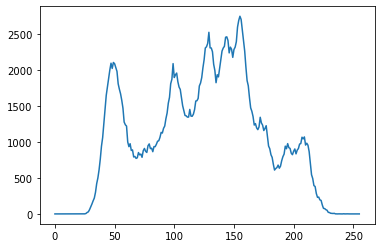

In [34]:
img = cv2.imread("./fig1/lenna.bmp",0)


hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.plot(hist)
plt.show()

cv2.imshow("img",img)

cv2.waitKey()
cv2.destroyAllWindows()

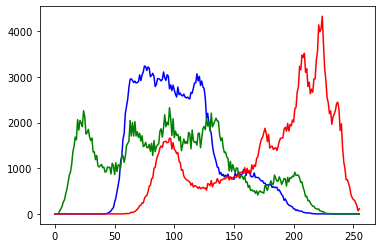

In [34]:
img = cv2.imread("./fig1/lenna.bmp",1)


hist_b = cv2.calcHist([img],[0],None,[256],[0,256])
hist_g = cv2.calcHist([img],[1],None,[256],[0,256])
hist_r = cv2.calcHist([img],[2],None,[256],[0,256])


plt.plot(hist_b, color="b")
plt.plot(hist_g, color="g")
plt.plot(hist_r, color="r")

plt.show()

cv2.imshow("img",img)

cv2.waitKey()
cv2.destroyAllWindows()

In [35]:
def getGrayHistImage(hist):
    imgHist = np.full((200,256), 255, dtype = np.uint8)
    
    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 200)
        pt2 = (x,200 - int(hist[x,0]*200/histMax))
        cv2.line(imgHist,pt1, pt2, 0)
        
    return imgHist

In [36]:
img = cv2.imread("./fig1/lenna.bmp",0)

hist = cv2.calcHist([img],[0], None, [256], [0,256])
# hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
# hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])

#plt.plot(hist_b, color = 'b')
#plt.plot(hist_g, color = 'g')
#plt.plot(hist_r, color = 'r')

# plt.show()
histimg = getGrayHistImage(hist)

cv2.imshow('img', img)
cv2.imshow('histimg', histimg)

cv2.waitKey()
cv2.destroyAllWindows()

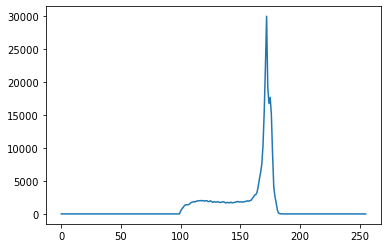

In [7]:
src = cv2.imread("./fig1/fig/puppy_shrink.png",0)

hist = cv2.calcHist([src],[0],None,[256],[0,256])

plt.plot(hist)
plt.show()

cv2.imshow("src",src)




cv2.waitKey()
cv2.destroyAllWindows()

In [37]:
src = cv2.imread("./fig1/fig/puppy_shrink.png",0)


minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src,None)

cv2.imshow("minVal",minVal)
cv2.imshow("maxVal",maxVal)
cv2.imshow("minLoc",minLoc)
cv2.imshow("maxLoc",maxLoc)



cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
src = cv2.imread("./fig1/fig/puppy_shrink.png",0)

minVal, maxVal,minLoc,MaxLoc = cv2.minMaxLoc(src,None)


dst_norm = np.clip((src-minVal)*255/(maxVal-minVal)+0.,0,255).astype(np.uint8)

dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
dst_equ = cv2.equalizeHist(src)

cv2.imshow('src',src)
cv2.imshow('dst_norm',dst_norm)
cv2.imshow('dst_equ',dst_equ)

cv2.waitKey()
cv2.destroyAllWindows()

In [39]:
src = cv2.imread("./fig1/fig/manjang.jpg",0)

if src is None:
    print('image read failed')
    sys.exit()
    
dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
dst_equ = cv2.equalizeHist(src)

cv2.imshow("src",src)
cv2.imshow("dst_norm",dst_norm)
cv2.imshow("dst_equ",dst_equ)


cv2.waitKey()
cv2.destroyAllWindows()

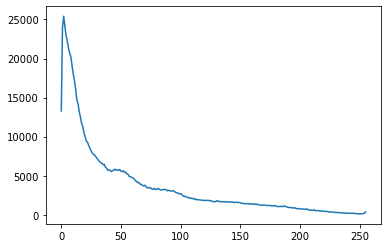

minVal 0.0
maxVal 255.0
minLoc (536, 0)
maxLoc (424, 89)


In [40]:
src = cv2.imread("./fig1/fig/manjang.jpg",0)

if src is None:
    print('image read failed')
    sys.exit()
    
hist = cv2.calcHist([src],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
# 히스토그램 그래프
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src,None)
print('minVal', minVal)
print('maxVal', maxVal)
print('minLoc', minLoc)
print('maxLoc', maxLoc)
dst_norm = np.clip((src-minVal)*255/(maxVal-minVal)+0.,0,255).astype(np.uint8)

dst_norm =cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
dst_equ = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_equ', dst_equ)

cv2.waitKey()
cv2.destroyAllWindows()

In [41]:
src = cv2.imread("./fig1/images2/food-g5b8d74a39_640.jpg", cv2.IMREAD_REDUCED_COLOR_2)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(src_hsv)

v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)
v_equal = cv2.equalizeHist(v)

dst_norm = cv2.merge((h,s,v_norm))
dst_equal = cv2.merge((h,s,v_equal))


dst_norm = cv2.cvtColor(dst_norm, cv2.COLOR_HSV2BGR)
dst_equal = cv2.cvtColor(dst_equal, cv2.COLOR_HSV2BGR)

cv2.imshow("src",src)
cv2.imshow("norm",dst_norm)
cv2.imshow("equal",dst_equal)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
#크로마키합성
#파레트에서 색상을 뽑아보자

def ontrack(pos):
    hmin = cv2.getTrackbarPos('h_min','dst')
    hmax = cv2.getTrackbarPos('h_max','dst')
    smin = cv2.getTrackbarPos('s_min','dst')
    
    dst = cv2.inRange(src_hsv,(hmin, smin, 0),(hmax,255,255))
#     dst = cv2.inRange(src_hsv,(hmin, 0, 0,255),(hmax,255,255))

    cv2.imshow('dst',dst)
    
    

src = cv2.imread("./fig1/fig/palette.png")

src_hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)

src_bgr = cv2.inRange(src,(0,128,0),(50,255,50))
src_hsv = cv2.inRange(src_hsv,(50,180,0),(70,255,255))

cv2.imshow("src",src)
cv2.imshow("src_bgr",src_bgr)
cv2.imshow("src_hsv",src_hsv)
cv2.createTrackbar('h_min','dst',20,179,ontrack)
cv2.createTrackbar('h_max','dst',100,179,ontrack)
cv2.createTrackbar('s_min','dst',60,255,ontrack)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2363: error: (-27:Null pointer) NULL window: 'dst' in function 'icvCreateTrackbar'
